In [1]:
import numpy as np

# Generate a random dataset with 50 samples and 2 features
np.random.seed(0)
X = np.random.randn(50, 2)

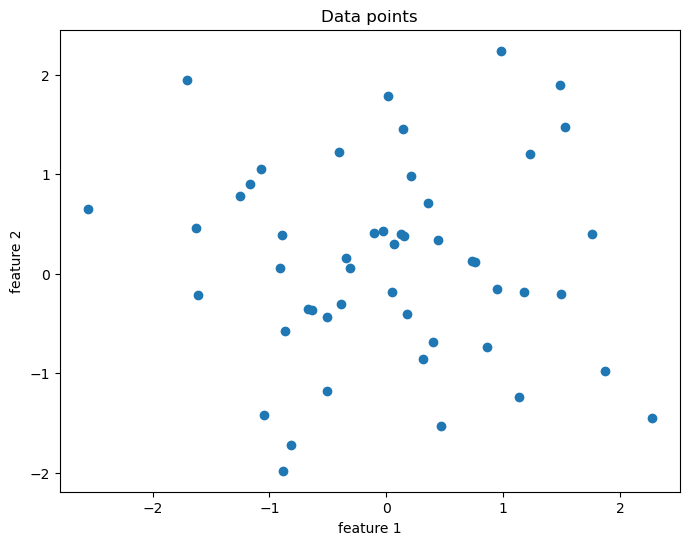

In [2]:
import matplotlib.pyplot as plt

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # put a caption on the plot
    plt.title('Data points')
    # label the x-axis
    plt.xlabel('feature 1')
    # label the y-axis
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    # Plot the data points and their assigned labels
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

[2 1 2 2 1 1 2 1 2 2 0 2 2 2 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 2 2
 2 0 0 0 2 1 2 1 1 1 1 1 1]


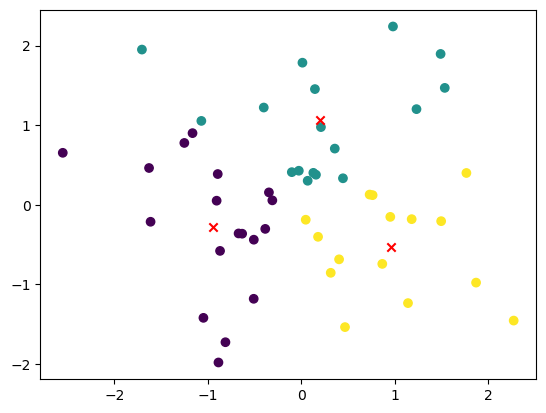

In [3]:
from scipy.cluster.vq import kmeans, vq

# Specify the number of clusters
k = 3

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0]


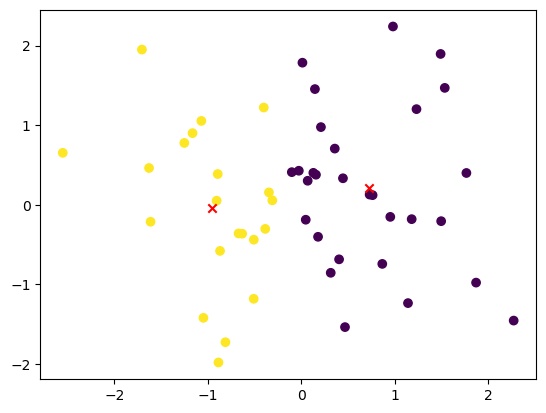

In [4]:
# Specify the number of clusters
k = 2

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate the clustering results using the Silhouette score
silhouette_score = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette_score:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz_score:.2f}')

Silhouette score: 0.31
Calinski-Harabasz index: 25.77


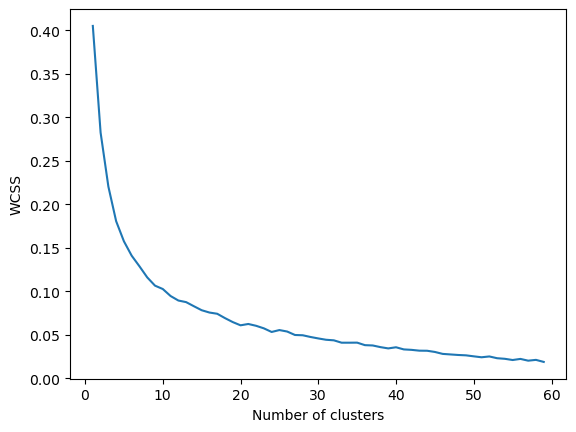

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset
np.random.seed(62)
X = np.random.rand(100, 2)

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(1, 60):
    centroids, distortion = kmeans(X, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(1, 60), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[1 2 2 2 0 2 2 2 0 1 0 2 2 1 1 1 2 1 0 2 2 1 1 0 0 1 0 0 2 2 1 1 2 2 1 2 2
 0 1 0 0 0 2 2 0 2 2 0 2 1 0 2 2 0 1 2 0 2 0 2 1 1 0 1 0 2 0 2 2 1 0 0 2 2
 0 1 1 0 1 0 1 1 0 2 0 2 0 2 0 2 1 0 1 2 2 2 0 0 0 1]


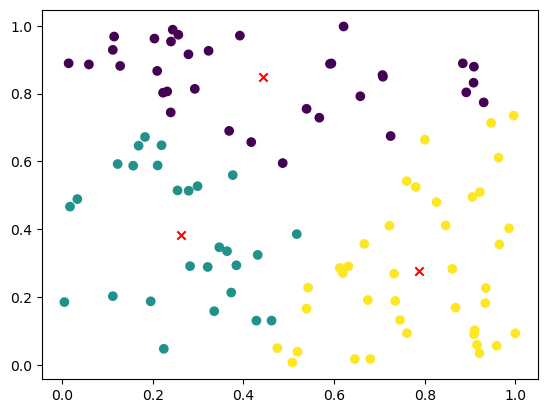

In [7]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)
print(labels)

plot_data_clusters(X, labels, centroids)

In [8]:
from scipy.spatial.distance import cdist

def mean_distance_similarity(X, labels):
    # Compute the mean distance between elements in each cluster
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)
    
    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))
    
    return similarity

# Compute the mean distance similarity
mean_distance_similarity = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mean_distance_similarity:.2f}')

Mean distance similarity: 0.32


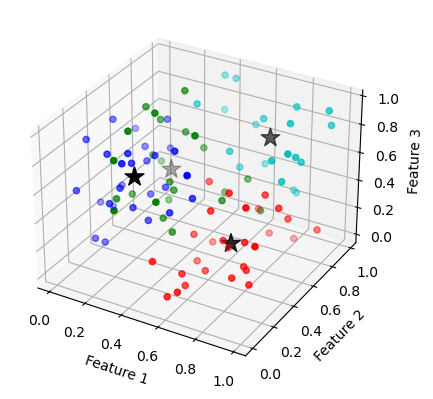

In [9]:
# 1. Modify the mock database to have 100 samples and 3 features. Perform k-means clustering with k=4 and visualize the results using 
# different marker styles for each cluster.

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate random data with 100 samples and 3 features
np.random.seed(42)
X = np.random.rand(100, 3)

# Define k-means clustering function
def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

# Perform k-means clustering with k=4
labels, centroids = kmeans_basic(X, k=4)

# Visualize the results using different marker styles for each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c']
for i in range(4):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], c=colors[i], marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='*', s=200)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

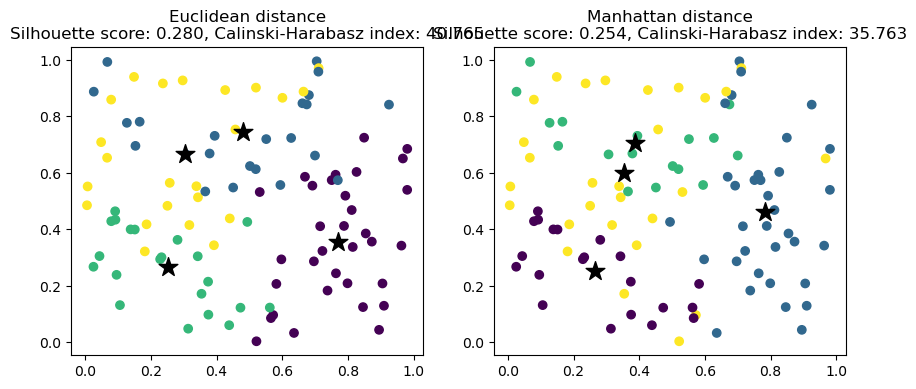

In [10]:
# 2. Implement a new similarity measure based on Manhattan (cityblock) distance for k-means clustering and compare the clustering 
# performance using Silhouette score and Calinski-Harabasz index with the Euclidean distance measure.

# Hint: check the documentation for the *cdist* function.

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

def kmeans_manhattan(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

# Generate mock data
np.random.seed(123)
X = np.random.rand(100, 3)

# Perform k-means clustering using Euclidean distance
labels_euc, centroids_euc = kmeans_basic(X, k=4)
silhouette_euc = silhouette_score(X, labels_euc)
calinski_euc = calinski_harabasz_score(X, labels_euc)

# Perform k-means clustering using Manhattan distance
labels_man, centroids_man = kmeans_manhattan(X, k=4)
silhouette_man = silhouette_score(X, labels_man, metric='cityblock')
calinski_man = calinski_harabasz_score(X, labels_man)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(X[:, 0], X[:, 1], c=labels_euc)
ax1.scatter(centroids_euc[:, 0], centroids_euc[:, 1], marker='*', s=200, c='k')
ax1.set_title(f"Euclidean distance\nSilhouette score: {silhouette_euc:.3f}, Calinski-Harabasz index: {calinski_euc:.3f}")

ax2.scatter(X[:, 0], X[:, 1], c=labels_man)
ax2.scatter(centroids_man[:, 0], centroids_man[:, 1], marker='*', s=200, c='k')
ax2.set_title(f"Manhattan distance\nSilhouette score: {silhouette_man:.3f}, Calinski-Harabasz index: {calinski_man:.3f}")

plt.show()

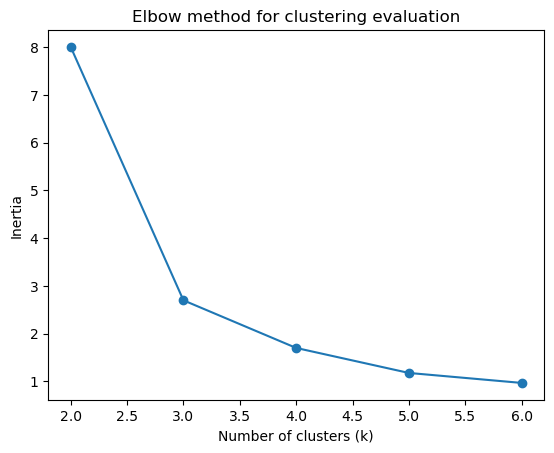

In [11]:
# 3. Generate a new mock database with 5 clusters and 2 features. Perform k-means clustering with different values of k (2, 3, 4, 5, 6) and 
# compare the clustering performance using the elbow method. 

# Hint: to create the database choose random 5 points (the centroids); generate 5 random values for the clusters radiuses for each centroid 
# in such a way that the circles are disjoint; within eacho of the 5 circles generate 20 random points.  

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate mock data with 5 clusters and 2 features
np.random.seed(42)

# Centroids of the clusters
centroids = np.random.rand(5, 2)

# Radius of each cluster
radii = np.random.rand(5) * 0.2 + 0.1

# Generate data points for each cluster
X = []
for i in range(5):
    r = radii[i]
    x, y = np.random.rand(2, 20)
    x = x * r * np.cos(np.linspace(0, 2*np.pi, 20)) + centroids[i, 0]
    y = y * r * np.sin(np.linspace(0, 2*np.pi, 20)) + centroids[i, 1]
    X.append(np.vstack([x, y]).T)
X = np.vstack(X)

# Perform k-means clustering with different values of k
ks = range(2, 7)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for clustering evaluation')
plt.show()

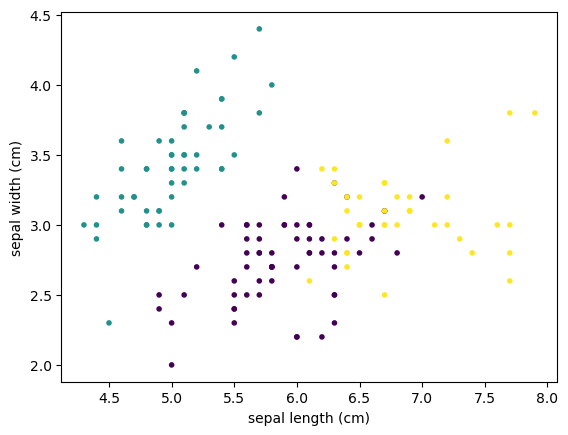

Silhouette score: 0.5528190123564097
Calinski-Harabasz score: 561.62775662962


In [12]:
# 4. Use the iris dataset from Scikit-learn and perform k-means clustering with k=3. Visualize the results using a scatter plot with 
# different marker styles for each cluster. Evaluate the clustering performance using Silhouette score and Calinski-Harabasz index.

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Evaluate the clustering performance
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
print('Silhouette score:', silhouette)
print('Calinski-Harabasz score:', calinski_harabasz)